#Install

In [ ]:
# ! sudo apt-get update
# ! sudo apt-get install texlive-latex-recommended
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
# ! wget http://mirrors.ctan.org/macros/latex/...
# ! unzip type1cm.zip -d /tmp/type1cm
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
# ! sudo texhash
# !apt install cm-super
# !pip install igraph

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,757 kB]
Get:13 http://archive.ubuntu.com/ubuntu

#Packcage imports

In [ ]:
import random
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from igraph import Graph
from scipy.optimize import curve_fit
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
import random
import seaborn as sns

#Set plot params

In [ ]:
rc('text', usetex=True)
font = {'family' : 'normal',
         'weight' : 'bold',
         'size'   : 12}

rc('font', **font)
params = {'legend.fontsize': 12}
plt.rcParams.update(params)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif":"Helvetica",
})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Plot AUC x Ncs

Mounted at /content/drive


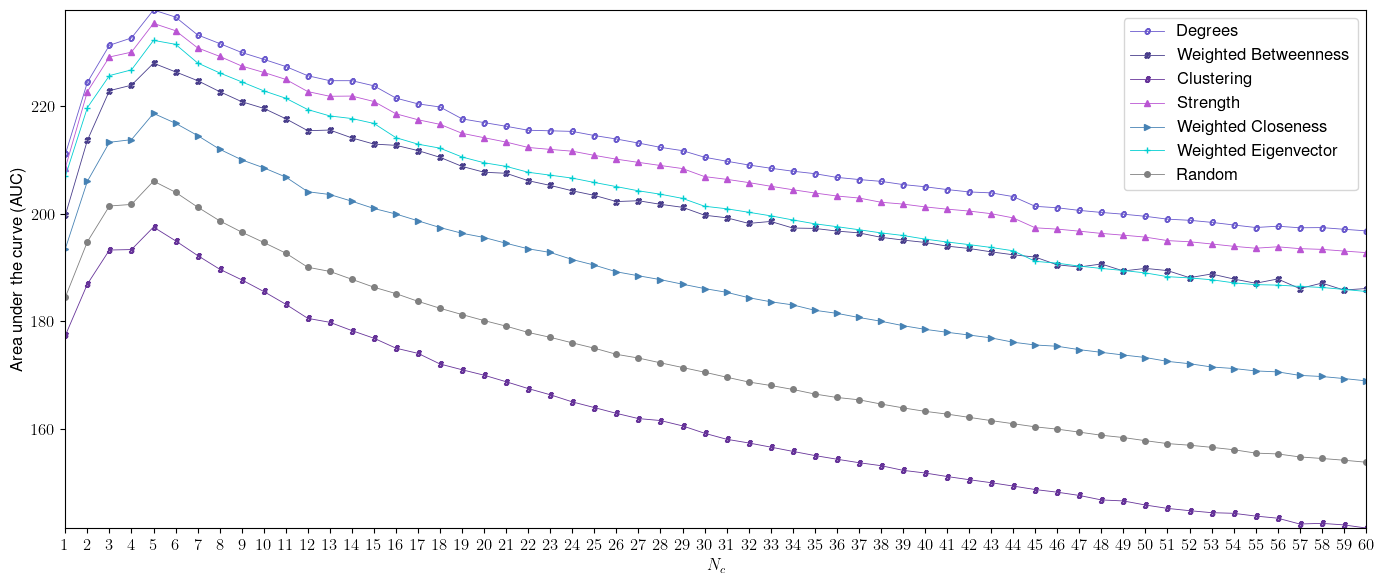

In [ ]:
def uniques(lst):
    uniqlst = []

    for item in lst:
        if item not in uniqlst:
            uniqlst.append(item)
    return uniqlst



colors   = ['SlateBlue', 'DarkSlateBlue','RebeccaPurple','MediumOrchid', 'SteelBlue', 'DarkTurquoise','gray']
metric_lst = ['Degrees','Weighted Betweenness','Clustering','Strength', 'Weighted Closeness' , 'Weighted Eigenvector','Random']
lbls = [r'$o$', r'$x$', r'$s$', r'^', r'>', r'+','o']



from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/V2Collection_Comparison.csv")


x_axis = df['Minimum number of cases']
df['Random']=(df['Upper rand']+df['Lower rand'])/2
y_areas = [
    df['Degrees'],
    df['Weighted Betweenness'],
    df['Clustering'],
    df['Strength'],
    df['Weighted Closeness '],
    df['Weighted Eigenvector '],
    df['Random']
]


def plot(x_axis, y_areas, labels, colors, metric_lst,  out_fileName, title):
    plt.figure(figsize=(14, 6))
    for index, area in enumerate(y_areas):

        if metric_lst[index][-1] == 'W' or metric_lst[index][-1] == 'H':
            plt.xticks(np.arange(min(x_axis), max(x_axis) + 1, 1))  # Avança de 1 em 1
            plt.plot(x_axis, area, color=colors[index], label=labels[index], marker=lbls[index], lw=0.6, linestyle="--", markersize=4)

        else:
            plt.xticks(np.arange(min(x_axis), max(x_axis) + 1, 1))  # Avança de 1 em 1
            plt.plot(x_axis, area, color=colors[index], label=labels[index],marker=lbls[index], lw=0.6, linestyle="-", markersize=4)

    plt.xlabel(r'$N_c$')
    plt.ylabel("Area under the curve (AUC)")
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)
    plt.legend()
    plt.tight_layout()

    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/{out_fileName}.pdf', dpi=350)
    plt.show()

plot(x_axis, y_areas, metric_lst, colors, metric_lst, 'table_Comparasion', 'Título do Gráfico')


#Plot Logistc fit and metrics

In [ ]:

def calculate_random_metric_averages(data_df):
    normalized_values = {}
    accumulated_sum_degree = 0
    accumulated_sum_clustering = 0
    accumulated_sum_strength = 0
    accumulated_sum_betweenness = 0
    accumulated_sum_closeness_w = 0
    accumulated_sum_eignv_w = 0
    dates = data_df['date'].unique()
    normalized_values['Date'] = dates.tolist()
    normalized_values['Degree'] = []
    normalized_values['Clustering'] = []
    normalized_values['Strength'] = []
    normalized_values['Weighted Betweenness'] = []
    normalized_values['Weighted Closeness'] = []
    normalized_values['Weighted Eignv'] = []
    geocodes = list(data_df['geocode'])
    soma_degree = data_df['degree'].sum()
    soma_strength = data_df['strength'].sum()
    soma_clustering = data_df['clustering'].sum()
    soma_betweenness = data_df['Weighted_betweenness'].sum()
    soma_closeness_w = data_df['Weighted_closeness'].sum()
    soma_eignv_w = data_df['Weighted_eignv'].sum()

    for date in dates:
        cities = data_df[data_df['date'] == date]['geocode'].unique()
        num_cities = len(cities)
        random_cities = []
        random_cities = random.sample(geocodes, num_cities)
        geocodes = list(set(geocodes) - set(random_cities))

        selected_data = data_df[(data_df['geocode'].isin(random_cities))]

        sum_degree = selected_data['degree'].sum()
        sum_clustering = selected_data['clustering'].sum()
        sum_strength = selected_data['strength'].sum()
        sum_betweenness = selected_data['Weighted_betweenness'].sum()
        sum_closeness = selected_data['Weighted_closeness'].sum()
        sum_eignv = selected_data['Weighted_eignv'].sum()

        accumulated_sum_degree += sum_degree
        accumulated_sum_clustering += sum_clustering
        accumulated_sum_strength += sum_strength
        accumulated_sum_betweenness += sum_betweenness
        accumulated_sum_closeness_w += sum_closeness
        accumulated_sum_eignv_w += sum_eignv

        normalized_values['Degree'].append(accumulated_sum_degree / soma_degree)
        normalized_values['Clustering'].append(accumulated_sum_clustering / soma_clustering)
        normalized_values['Strength'].append(accumulated_sum_strength / soma_strength)
        normalized_values['Weighted Betweenness'].append(accumulated_sum_betweenness / soma_betweenness)
        normalized_values['Weighted Closeness'].append(accumulated_sum_closeness_w / soma_closeness_w)
        normalized_values['Weighted Eignv'].append(accumulated_sum_eignv_w / soma_eignv_w)

    df_normalized = pd.DataFrame(normalized_values)
    return df_normalized

def filter_cases(csv_file, n):
    df = pd.read_csv(
        csv_file,
        encoding='utf-8',
        sep=',',
        usecols=['ibgeID', 'newCases', 'totalCases', 'date'],
        dtype={'ibgeID': int}
    )
    filtered_df = df[(df['totalCases'] >= n) & (df['newCases'] >= 1) & (df['ibgeID'] != 0) & (df['ibgeID'] > 1000)]
    filtered_df = filtered_df.drop_duplicates(subset='ibgeID')
    return filtered_df

def logistic_growth(x, a, b, k):
    return a / (1 + b * np.exp(-k * x))

rc('text', usetex=True)
font = {'family' : 'normal',
         'weight' : 'bold',
         'size'   : 12}

rc('font', **font)
params = {'legend.fontsize': 12}
plt.rcParams.update(params)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif":"Helvetica",
})

def plotGraph(leng, minimum_cases):
    upper_bound = mean_table + 2 * std_table
    lower_bound = mean_table - 2 * std_table

    point_indices = np.linspace(0, len(dates) - 1, num=30)
    date_indices = np.arange(len(dates))
    soma_degree = df['degree'].sum()
    soma_strength = df['strength'].sum()
    soma_clustering = df['clustering'].sum()
    soma_betweenness = df['Weighted_betweenness'].sum()
    soma_closeness = df['Weighted_closeness'].sum()
    soma_eignv = df['Weighted_eignv'].sum()
    soma_cases = metrics_table['Cases Accumulated'].sum()
    degree_interp = np.interp(point_indices, date_indices, metrics_table['Degree Accumulated']) / soma_degree
    clustering_interp = np.interp(point_indices, date_indices, metrics_table['Clustering Accumulated']) / soma_clustering
    strength_interp = np.interp(point_indices, date_indices, metrics_table['Strength Accumulated']) / soma_strength
    betweenness_interp = np.interp(point_indices, date_indices, metrics_table['Betweenness Accumulated']) / soma_betweenness
    closeness_interp = np.interp(point_indices, date_indices, metrics_table['Closeness Accumulated']) / soma_closeness
    eignv_interp = np.interp(point_indices, date_indices, metrics_table['Eignv Accumulated']) / soma_eignv
    cases_interp = np.interp(point_indices, date_indices, metrics_table['Cases Accumulated']) / soma_cases
    # Store the interpolation data in a pandas DataFrame
    interp_data_df = pd.DataFrame({
        'Degree': degree_interp,
        'Weighted Betweenness': betweenness_interp,
        'Clustering': clustering_interp,
        'Strength': strength_interp,
        'Weighted Closeness': closeness_interp,
        'Weighted Eigenvector': eignv_interp,
        'Cumulative Cases per Day': cases_interp,
    })

    # Calculate the area under each curve using numerical integration (trapezoidal rule)
    areas = interp_data_df.apply(lambda col: np.trapz(col, dx=1))

    popt_clustering, _ = curve_fit(logistic_growth, point_indices, clustering_interp)
    popt_betweenness, _ = curve_fit(logistic_growth, point_indices, betweenness_interp)

    clustering_fit = logistic_growth(point_indices, *popt_clustering)
    betweenness_fit = logistic_growth(point_indices, *popt_betweenness)




    plt.figure(figsize=(12, 6))
    plt.plot(point_indices, degree_interp, label=f'Degree', marker='$k$',color ='SlateBlue')
    plt.plot(point_indices, betweenness_interp, label=f'Weighted Betweenness', marker='$s$',color ='DarkSlateBlue')
    plt.plot(point_indices, clustering_interp, label=f'Clustering', marker='$b$',color ='RebeccaPurple')
    plt.plot(point_indices, strength_interp, label=f'Strength', marker='$b_w$',color ='MediumOrchid')
    plt.plot(point_indices, closeness_interp, label=f'Weighted Closeness', marker='$c$',color ='SteelBlue')
    plt.plot(point_indices, eignv_interp, label=f'Weighted Eigenvector', marker='$c_w$',color ='DarkTurquoise')
    plt.plot(point_indices,cases_interp, marker='o', linestyle='-', color='b', label='Normalized Cumulative Cases')
    # plt.plot(point_indices, cases_interp, marker='$t_c$', color='orange', label='Total Cases')

    #plt.plot(point_indices, cases_interp, marker='o', linestyle='-', color='b', label='Normalized Accumulated New Cases')

    plt.fill_between(mean_table.index, lower_bound['Degree'], upper_bound['Degree'], color='gray', alpha=0.3)
    plt.fill_between(mean_table.index, lower_bound['Clustering'], upper_bound['Clustering'], color='gray', alpha=0.3)
    plt.fill_between(mean_table.index, lower_bound['Strength'], upper_bound['Strength'], color='gray', alpha=0.3)
    plt.fill_between([], [], [], color='gray', alpha=0.3, label='Development with Random Cases')

    plt.plot(point_indices, clustering_fit, 'g--')
    plt.plot(point_indices, betweenness_fit, 'b--')



    plt.annotate(f'Logistic Fit (Clustering)\nA: {popt_clustering[0]:.2f}, B: {popt_clustering[1]:.2f}, K: {popt_clustering[2]:.2f}',
                 xy=(point_indices[5], clustering_fit[5]), xycoords='data',
                 xytext=(point_indices[8], clustering_fit[6]), textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.annotate(f'Logistic Fit (Weighted Betweenness)\nA: {popt_betweenness[0]:.2f}, B: {popt_betweenness[1]:.2f}, K: {popt_betweenness[2]:.2f}',
                 xy=(point_indices[4], betweenness_fit[4]), xycoords='data',
                 xytext=(point_indices[0]+ 0.3, betweenness_fit[8]), textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))



    plt.legend(fontsize='medium')
    plt.text(0.8, 0.90, f'Number of Cities: {leng}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    visible_indices = np.arange(0, len(metrics_table), step=30)
    visible_dates = metrics_table['date'].iloc[visible_indices]
    plt.xticks(visible_indices, visible_dates, rotation=45)

    plt.xlabel('Date')
    plt.ylabel(f'Normalized Cumulative Cases per Day')
    plt.tight_layout()
    plt.xlim(0, len(metrics_table) - 1)
    plt.ylim(0, 1)
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/IC/Accumulated_metricas_{minimum_cases}cases.pdf', bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
graph = Graph.Read_GraphML("/content/drive/MyDrive/Colab Notebooks/IC/Datas/networks/grafo_Peso_Geral.GraphML")
geocodes = list(map(int, graph.vs["geocode"]))
degrees = graph.degree()
clustering = graph.transitivity_local_undirected()
strength = graph.strength(weights="weight")
graph.es['w_inv'] = 1.0 / np.array(graph.es['weight'])
weighted_betweenness = graph.betweenness(vertices=None, directed=False, cutoff=None, weights='w_inv')
weighted_closeness = graph.closeness(vertices=None, mode='all', cutoff=None, weights='w_inv', normalized=True)
weighted_eignv = graph.evcent(directed=False, scale=True, weights='w_inv', return_eigenvalue=False)

metrics_df = pd.DataFrame({
    "geocode": geocodes,
    "degree": degrees,
    "clustering": clustering,
    "strength": strength,
    "Weighted_betweenness": weighted_betweenness,
    "Weighted_closeness": weighted_closeness,
    "Weighted_eignv": weighted_eignv
})
degrees_avg = []
betweenness_avg = []
clustering_avg = []
strength_avg = []
closeness_avg = []
eignv_avg = []

mean_random_avg = []
std_random_avg = []
min_cases = [5]
leng = []

df = filter_cases("/content/drive/MyDrive/Colab Notebooks/IC/Datas/Pre-processed/cases-brazil-cities-time_2020.csv", min_cases[0])

df = df.merge(metrics_df, left_on='ibgeID', right_on='geocode')
df = df.sort_values("date")
df_sum = df.groupby('date').sum().reset_index()
leng.append(len(df['ibgeID']))

# Calculate the accumulated values for each metric
df_sum['Degree Accumulated'] = df_sum['degree'].cumsum()
df_sum['Clustering Accumulated'] = df_sum['clustering'].cumsum()
df_sum['Strength Accumulated'] = df_sum['strength'].cumsum()
df_sum['Betweenness Accumulated'] = df_sum['Weighted_betweenness'].cumsum()
df_sum['Closeness Accumulated'] = df_sum['Weighted_closeness'].cumsum()
df_sum['Eignv Accumulated'] = df_sum['Weighted_eignv'].cumsum()
df_sum['Cases Accumulated'] = df_sum['newCases'].cumsum()
metrics_table = df_sum[['date', 'Degree Accumulated', 'Clustering Accumulated', 'Strength Accumulated',
                            'Betweenness Accumulated', 'Closeness Accumulated', 'Eignv Accumulated', 'Cases Accumulated']]
#print(metrics_table)


<ipython-input-28-33003e97ef51>:1: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:487
  graph = Graph.Read_GraphML("/content/drive/MyDrive/Colab Notebooks/IC/Datas/networks/grafo_Peso_Geral.GraphML")


Mounted at /content/drive


In [ ]:
metrics_df

,geocode,degree,clustering,strength,Weighted_betweenness,Weighted_closeness,Weighted_eignv
0,1302603,73,0.088661,4404.5,262625.0,26.176193,0.008371
1,1304260,5,1.000000,90.5,0.0,15.141611,0.000094
2,1302108,3,1.000000,77.0,0.0,14.840713,0.000115
3,5103809,12,0.818182,1566.0,10474.0,35.938431,0.001339
4,5108402,106,0.295597,5770.0,35617.0,37.027813,0.091256
...,...,...,...,...,...,...,...
5380,2111722,1,NaN,7.0,0.0,5.552964,0.002172
5381,2205359,1,NaN,7.0,0.0,5.857899,0.000254
5382,5104526,1,NaN,14.0,0.0,10.166832,0.000849
5383,5106240,1,NaN,21.0,0.0,13.413105,0.000566


In [ ]:
df_sum

,date,ibgeID,newCases,totalCases,geocode,degree,clustering,strength,Weighted_betweenness,Weighted_closeness,Weighted_eignv,Degree Accumulated,Clustering Accumulated,Strength Accumulated,Betweenness Accumulated,Closeness Accumulated,Eignv Accumulated,Cases Accumulated
0,2020-03-05,3550308,3,6,3550308,1461,0.024956,76190.875,2037696.0,39.141769,1.000000,1461,0.024956,76190.875,2037696.0,39.141769,1.000000,3
1,2020-03-12,7411459,16,18,7411459,888,0.164948,51731.250,2183206.0,76.755713,0.765071,2349,0.189904,127922.125,4220902.0,115.897482,1.765071,19
2,2020-03-14,7911714,10,14,7911714,855,0.212707,52131.250,1655413.0,77.119049,0.941493,3204,0.402610,180053.375,5876315.0,193.016531,2.706564,29
3,2020-03-15,2910800,1,5,2910800,436,0.090077,23365.250,474521.0,38.472125,0.316739,3640,0.492687,203418.625,6350836.0,231.488656,3.023302,30
4,2020-03-16,14628317,18,24,14628317,1611,0.431975,78711.750,1788722.0,150.875972,1.453594,5251,0.924663,282130.375,8139558.0,382.364628,4.476897,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-16,3145703,1,5,3145703,2,1.000000,77.000,0.0,12.344236,0.000035,130922,3439.343479,6726038.000,83580916.0,136721.802942,130.078060,16407
248,2020-12-20,6301406,3,11,6301406,12,1.557143,646.000,0.0,52.168811,0.003480,130934,3440.900622,6726684.000,83580916.0,136773.971753,130.081540,16410
249,2020-12-26,3125507,1,5,3125507,17,0.838235,2739.000,30237.0,35.380479,0.001495,130951,3441.738857,6729423.000,83611153.0,136809.352232,130.083035,16411
250,2020-12-29,2210391,4,8,2210391,1,0.000000,14.000,0.0,9.809114,0.000619,130952,3441.738857,6729437.000,83611153.0,136819.161345,130.083654,16415


In [ ]:
metrics_table

,date,Degree Accumulated,Clustering Accumulated,Strength Accumulated,Betweenness Accumulated,Closeness Accumulated,Eignv Accumulated,Cases Accumulated
0,2020-03-05,1461,0.024956,76190.875,2037696.0,39.141769,1.000000,3
1,2020-03-12,2349,0.189904,127922.125,4220902.0,115.897482,1.765071,19
2,2020-03-14,3204,0.402610,180053.375,5876315.0,193.016531,2.706564,29
3,2020-03-15,3640,0.492687,203418.625,6350836.0,231.488656,3.023302,30
4,2020-03-16,5251,0.924663,282130.375,8139558.0,382.364628,4.476897,48
...,...,...,...,...,...,...,...,...
247,2020-12-16,130922,3439.343479,6726038.000,83580916.0,136721.802942,130.078060,16407
248,2020-12-20,130934,3440.900622,6726684.000,83580916.0,136773.971753,130.081540,16410
249,2020-12-26,130951,3441.738857,6729423.000,83611153.0,136809.352232,130.083035,16411
250,2020-12-29,130952,3441.738857,6729437.000,83611153.0,136819.161345,130.083654,16415


In [ ]:
metrics_table = metrics_table.reset_index(drop=True)
dates = df_sum['date']
result_list = [calculate_random_metric_averages(df) for _ in range(500)]
combined_table = pd.concat(result_list)
mean_table = combined_table.groupby('Date').mean()
std_table = combined_table.groupby('Date').std()

<ipython-input-24-7d867f8bb13d>:72: RuntimeWarning: overflow encountered in exp
  return a / (1 + b * np.exp(-k * x))


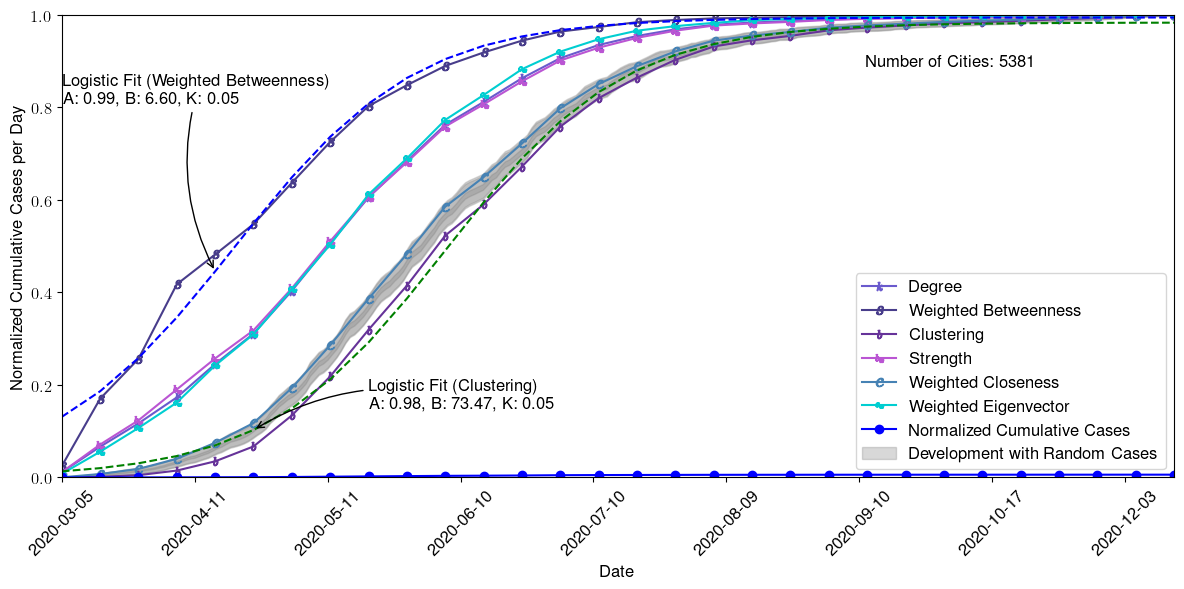

In [ ]:
plotGraph(leng[0],min_cases[0])

In [ ]:
df_sum.describe()

,ibgeID,newCases,totalCases,geocode,degree,clustering,strength,Weighted_betweenness,Weighted_closeness,Weighted_eignv,Degree Accumulated,Clustering Accumulated,Strength Accumulated,Betweenness Accumulated,Closeness Accumulated,Eignv Accumulated,Cases Accumulated
count,2.520000e+02,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.000000,2.520000e+02,2.520000e+02,252.000000,252.000000,252.000000
mean,6.934707e+07,65.142857,135.039683,6.934707e+07,519.682540,13.660954,26706.591270,3.317903e+05,543.056655,0.516234,98120.642857,2199.239311,5.046223e+06,6.930570e+07,90911.568843,97.896100,10835.746032
std,7.448916e+07,79.388371,152.002668,7.448916e+07,588.775252,15.486579,30586.420983,6.265560e+05,595.819120,0.619128,42463.111735,1326.371876,2.154701e+06,2.180168e+07,51012.421055,42.749668,6190.822177
min,1.715150e+06,1.000000,5.000000,1.715150e+06,1.000000,0.000000,2.000000,0.000000e+00,1.878175,0.000007,1461.000000,0.024956,7.619088e+04,2.037696e+06,39.141769,1.000000,3.000000
25%,8.629279e+06,7.000000,16.000000,8.629279e+06,18.750000,1.424912,1103.625000,2.967500e+02,58.004740,0.010611,69835.500000,844.998371,3.598744e+06,6.241705e+07,42840.098110,69.425656,4920.250000
50%,3.753630e+07,29.000000,65.000000,3.753630e+07,280.000000,6.048298,14992.625000,6.107150e+04,263.841681,0.209194,123903.000000,2912.981902,6.328765e+06,8.187579e+07,119363.959085,124.784154,14402.000000
75%,1.063565e+08,99.250000,202.500000,1.063565e+08,904.000000,22.318223,44744.625000,3.895558e+05,850.178061,0.933078,130078.250000,3362.662336,6.681701e+06,8.340122e+07,134156.574007,129.545591,16104.500000
max,3.008924e+08,500.000000,763.000000,3.008924e+08,3073.000000,65.285880,168460.000000,4.148431e+06,2479.248889,3.315295,130960.000000,3442.560286,6.730061e+06,8.361115e+07,136850.277088,130.091090,16416.000000


# Plot Normalized cases

<ipython-input-27-7d867f8bb13d>:72: RuntimeWarning: overflow encountered in exp
  return a / (1 + b * np.exp(-k * x))
<ipython-input-31-446235b0cbc0>:107: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot(df_date_cum_cases_amostrado['date'], df_date_cum_cases_amostrado['Cumulative Cases per Day'],'--', linestyle='-', color='r', label='Normalized Cumulative Cases')


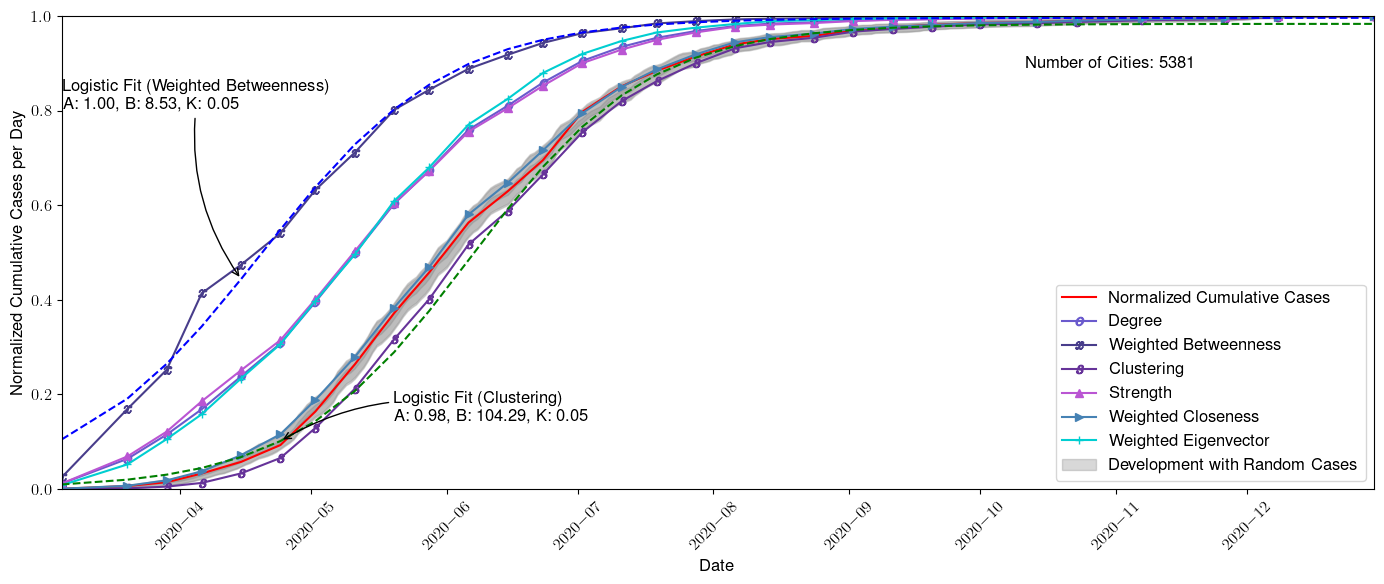

In [ ]:
df = filter_cases("/content/drive/MyDrive/Colab Notebooks/IC/Datas/Pre-processed/cases-brazil-cities-time_2020.csv", 5)

df = df.merge(metrics_df, left_on='ibgeID', right_on='geocode')
df = df.sort_values("date")
df_sum = df.groupby('date').sum().reset_index()
leng.append(len(df['ibgeID']))

soma_degree = df['degree'].sum()
soma_strength = df['strength'].sum()
soma_clustering = df['clustering'].sum()
soma_betweenness = df['Weighted_betweenness'].sum()
soma_closeness = df['Weighted_closeness'].sum()
soma_eignv = df['Weighted_eignv'].sum()
dates= df['date'].unique()
degree_interp = metrics_table['Degree Accumulated'] / soma_degree
clustering_interp = metrics_table['Clustering Accumulated'] / soma_clustering
strength_interp = metrics_table['Strength Accumulated'] / soma_strength
betweenness_interp = metrics_table['Betweenness Accumulated'] / soma_betweenness
closeness_interp = metrics_table['Closeness Accumulated'] / soma_closeness
eignv_interp = metrics_table['Eignv Accumulated'] / soma_eignv


csv_file = '/content/drive/MyDrive/Colab Notebooks/IC/Datas/Pre-processed/cases-brazil-cities-time_2020.csv'

def filter_cases(csv_file, n):
    df = pd.read_csv(
        csv_file,
        encoding='utf-8',
        sep=',',
        usecols=['ibgeID', 'newCases', 'totalCases', 'date'],
        dtype={'ibgeID': int}
    )
    # print(df.shape)
    filtered_df = df[(df['totalCases'] >= n) & (df['newCases'] >= 1) & (df['ibgeID'] > 1000)]
    # print(filtered_df.shape)
    filtered_df = filtered_df.drop_duplicates(subset='ibgeID')
    return filtered_df

df_covid = filter_cases(csv_file, 5)

df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid = df_covid.sort_values('date')
# print(df.shape)

reference_column = 'newCases'
df_date_cum_cases = df_covid.groupby('date')[reference_column].sum().reset_index()
df_date_cum_cases[reference_column] = df_date_cum_cases[reference_column].cumsum()
df_date_cum_cases.rename(columns={reference_column: 'Cumulative Cases per Day'}, inplace=True)
df_date_cum_cases['Cumulative Cases per Day'] /= df_date_cum_cases['Cumulative Cases per Day'].max()

df_date_cum_cases['Cases Accumulated'] = df_covid[reference_column].cumsum() / df_covid[reference_column].sum()
# Remove duplicate dates, keeping only the first occurrence
df_date_cum_cases = df_date_cum_cases.drop_duplicates('date', keep='first')

def remove_non_matching_dates(df_date_cum_cases, dates):
    df_dates_str = df_date_cum_cases['date'].dt.strftime('%Y-%m-%d')
    set_dates = set(df_dates_str)
    set_dates_2 = set(dates)
    # Find dates that are in one set but not in the other
    dates_not_in_df = set_dates_2 - set_dates
    dates_not_in_dates = set_dates - set_dates_2
    # Combine the two lists of non-matching dates
    dates_not_matching = list(dates_not_in_df.union(dates_not_in_dates))
    # Remove rows from the DataFrame that correspond to the non-matching dates
    df_date_cum_cases_filtered = df_date_cum_cases[~df_dates_str.isin(dates_not_matching)]
    return df_date_cum_cases_filtered


df_date_cum_cases=remove_non_matching_dates(df_date_cum_cases, dates)

upper_bound = mean_table + 2 * std_table
lower_bound = mean_table - 2 * std_table

visible_points_quantity = 30
sampled_indices = np.linspace(0, len(df_date_cum_cases) - 1, visible_points_quantity, dtype=int)
df_date_cum_cases_amostrado = df_date_cum_cases.iloc[sampled_indices]

degree_interp_amostrado = degree_interp.iloc[sampled_indices]
betweenness_interp_amostrado = betweenness_interp.iloc[sampled_indices]
clustering_interp_amostrado = clustering_interp.iloc[sampled_indices]
strength_interp_amostrado = strength_interp.iloc[sampled_indices]
closeness_interp_amostrado = closeness_interp.iloc[sampled_indices]
eignv_interp_amostrado = eignv_interp.iloc[sampled_indices]

first_day_amostrado = df_date_cum_cases_amostrado['date'].min()
dates_array= (df_date_cum_cases_amostrado['date'] - first_day_amostrado).dt.days.values
popt_clustering, _ = curve_fit(logistic_growth,dates_array, clustering_interp_amostrado)
popt_betweenness, _ = curve_fit(logistic_growth, dates_array, betweenness_interp_amostrado)


clustering_fit = logistic_growth(dates_array, *popt_clustering)
betweenness_fit = logistic_growth(dates_array, *popt_betweenness)

plt.figure(figsize=(14, 6))
plt.plot(df_date_cum_cases_amostrado['date'], df_date_cum_cases_amostrado['Cumulative Cases per Day'],'--', linestyle='-', color='r', label='Normalized Cumulative Cases')
plt.plot(df_date_cum_cases_amostrado['date'], degree_interp_amostrado, label=f'Degree', marker='$o$', color='SlateBlue')
plt.plot(df_date_cum_cases_amostrado['date'], betweenness_interp_amostrado, label=f'Weighted Betweenness', marker='$x$', color='DarkSlateBlue')
plt.plot(df_date_cum_cases_amostrado['date'], clustering_interp_amostrado, label=f'Clustering',  marker='$s$', color='RebeccaPurple')
plt.plot(df_date_cum_cases_amostrado['date'], strength_interp_amostrado, label=f'Strength', marker='^', color='MediumOrchid')
plt.plot(df_date_cum_cases_amostrado['date'], closeness_interp_amostrado, label=f'Weighted Closeness',  marker='>', color='SteelBlue')
plt.plot(df_date_cum_cases_amostrado['date'], eignv_interp_amostrado, label=f'Weighted Eigenvector', marker='+', color='DarkTurquoise')

plt.fill_between(mean_table.index, lower_bound['Clustering'], upper_bound['Clustering'], color='gray', alpha=0.3)
plt.fill_between(mean_table.index, lower_bound['Strength'], upper_bound['Strength'], color='gray', alpha=0.3)
plt.fill_between(mean_table.index, lower_bound['Degree'], upper_bound['Degree'], color='gray', alpha=0.3)

plt.plot(df_date_cum_cases_amostrado['date'], clustering_fit, 'g--')
plt.plot(df_date_cum_cases_amostrado['date'], betweenness_fit, 'b--')

from datetime import timedelta
plt.annotate(f'Logistic Fit (Clustering)\nA: {popt_clustering[0]:.2f}, B: {popt_clustering[1]:.2f}, K: {popt_clustering[2]:.2f}',
                 xy=(df_date_cum_cases_amostrado['date'].iloc[5], clustering_fit[5]), xycoords='data',
                 xytext=(df_date_cum_cases_amostrado['date'].iloc[8], clustering_fit[6]), textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.annotate(f'Logistic Fit (Weighted Betweenness)\nA: {popt_betweenness[0]:.2f}, B: {popt_betweenness[1]:.2f}, K: {popt_betweenness[2]:.2f}',
                 xy=(df_date_cum_cases_amostrado['date'].iloc[4], betweenness_fit[4]), xycoords='data',
                 xytext=(df_date_cum_cases_amostrado['date'].iloc[0]+ timedelta(days=0.3), betweenness_fit[8]), textcoords='data',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


plt.fill_between([], [], [], color='gray', alpha=0.3, label='Development with Random Cases')

#plt.plot(df_date_cum_cases['date'], regression_predictions, color='r', linestyle='--', label='Linear Regression (Cumulative Cases)')
l = leng[0]
plt.legend(fontsize='medium')
plt.text(0.8, 0.90, f'Number of Cities: {l}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Cases per Day')
plt.xticks(rotation=45)
# plt.xlim(df['date'][0], df['date'][-1])
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/IC/Accumulated_metricas_V2cases.pdf', bbox_inches='tight')
plt.show()


In [ ]:
print(df_date_cum_cases_amostrado['date'])

KeyError: 6

# Pearson Correlation

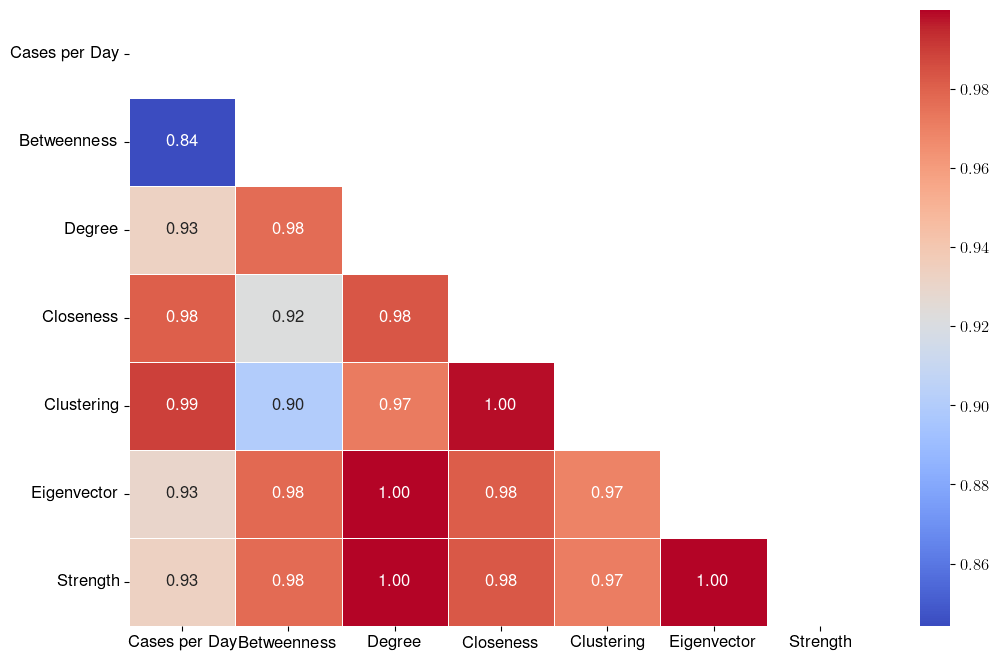

In [ ]:

df_pearson = pd.DataFrame({
    # 'date': df_date_cum_cases_amostrado['date'],
    'Cases per Day': df_date_cum_cases['Cumulative Cases per Day'],
    'Betweenness': betweenness_interp,
    'Degree': degree_interp,
    'Closeness': closeness_interp,
    'Clustering': clustering_interp,
    'Eigenvector': eignv_interp,
    'Strength': strength_interp,
})

corr = df_pearson.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/IC/Correlation Pearson.pdf', bbox_inches='tight')
plt.show()


# Set comparison

```
# Isto está formatado como código
```



In [ ]:
# Open the GraphML file and create a Graph object from it
graph = Graph.Read_GraphML("/content/drive/MyDrive/Colab Notebooks/IC/Datas/networks/grafo_Peso_Geral.GraphML")
min_cases = [1]
boolQ= True
# Initialize lists to store average similarity values for each column
degrees_integral = []
betweenness_integral = []
clustering_integral = []
strength_integral = []
closeness_w_integral = []
eignv_w_integral = []
Random_mean_integral = []
Random_std_integral = []

degrees_avg = []
betweenness_avg = []
clustering_avg = []
strength_avg = []
closeness_w_avg = []
eignv_w_avg = []

<ipython-input-6-c0678861ca9b>:2: RuntimeWarning: Could not add vertex ids, there is already an 'id' vertex attribute. at src/io/graphml.c:487
  graph = Graph.Read_GraphML("/content/drive/MyDrive/Colab Notebooks/IC/Datas/networks/grafo_Peso_Geral.GraphML")


In [ ]:

# Used to transform vertex data from 'graph' into a matrix
def get_matrix():
    # Get vertex information
    # Calculate the inverse of edge weights and store them in the 'w_inv' property
    graph.es['w_inv'] = 1.0 / np.array(graph.es['weight'])
    vertex_info = []
    geocodes = graph.vs["geocode"]
    degrees = graph.degree()
    betweenness = graph.betweenness(vertices=None, directed=False, cutoff=None, weights='w_inv')
    clustering = graph.transitivity_local_undirected()
    strength = graph.strength(weights="weight")
    closeness_w = graph.closeness(vertices=None, mode='all', cutoff=None, weights='w_inv', normalized=True)
    eignv_w = graph.evcent(directed=False, scale=True, weights='w_inv', return_eigenvalue=False)
    #prank_w = nx.pagerank(g_nx, alpha=0.85, weight='weight')
    #vuln_w = vn.vulnerability(graph, weights='w_inv')
    geocodes_int = list(map(int, geocodes))
    geocodes_strings = list(map(str,geocodes_int))
    # Construct the vertex information matrix
    vertex_info = list(zip(geocodes_strings, degrees, betweenness, clustering, strength, closeness_w, eignv_w))

    return vertex_info

# Filter cases from a CSV file based on a minimum number of cases
# and return a list of filtered elements and their data
def filter_cases(csv_file, n):
    # Read the CSV file and define the columns to be considered
    df = pd.read_csv(
        csv_file,
        encoding='utf-8',
        sep=',',
        usecols=['ibgeID', 'newCases', 'totalCases', 'date'],
        dtype={'ibgeID': int}  # Define the appropriate data type for ibgeID if possible
    )
    # Filter records that meet the requirements
    filtered_df = df[(df['totalCases'] >= n) & (df['newCases'] >= 1) & (df['ibgeID'] != 0) & (df['ibgeID'] > 1000)]
    # Remove duplicate records based on ibgeID
    filtered_df = filtered_df.drop_duplicates(subset='ibgeID')
    # Return the results as a list of tuples
    filtered_cases = list(zip(filtered_df['date'], filtered_df['ibgeID'].apply(repr)))
    return filtered_cases

def setUp_comparsion_table(cases):
# Set up the comparison matrix
    comparison_matrix = np.array([Id_matrix_covid, degrees_similarity, betweenness_similarity, clustering_similarity,
                              strength_similarity, closeness_w_similarity, eignv_w_similarity])
    Table_Names = ["DATES", "degrees", "betweenness", "clustering", "strength", "closeness_w", "eignv_w"]
    Final_Table = pd.DataFrame(comparison_matrix.T, columns=Table_Names)
# Save the final table to an Excel file
    excel_name = f"/content/drive/MyDrive/Colab Notebooks/IC/result_Compa_table-{cases}cases.xlsx"
    Final_Table.to_excel(excel_name, index=False)

# Filter records from list A based on a filtered list of cities with more than N Covid cases
def filter_records(list_A, list_B):
    # Create sets of geocodes for easy verification
    geocode_set_A = set(record[0] for record in list_A)
    geocode_set_B = set(record[1] for record in list_B)
    # Find geocodes that exist in both sets
    common_geocodes = geocode_set_A.intersection(geocode_set_B)
    # Filter records that meet the criteria
    filtered_list = [record for record in list_A if record[0] in common_geocodes]
    return filtered_list

def filter_records2(list_A, list_B):
    # Create a set of all geocodes in list A for easy verification
    geocode_set_A = set(record[0] for record in list_A)
    # Filter records in list B that meet the criteria
    filtered_list = [record for record in list_B if record[1] in geocode_set_A]
    return filtered_list
# Verify the similarity between an ordered list of cities based on a certain metric
# and the list of cities with B Covid cases over time

def compare_random(metrics_matrix):
    # Select the columns from the matrices
    result = []
    for i in range(1, matrix_size + 1):
        col1_elements = set(Id_matrix_covid[:i])
        col2_elements = set(metrics_matrix[:i, 0].astype(float))
        intersection = col1_elements.intersection(col2_elements)
        similarity_percentage = (len(intersection) / len(col1_elements))
        result.append(similarity_percentage)
    return result

def compare_columns(metrics_matrix, col_idx):
    # Select the columns from the matrices
    result = []
    aux = metrics_matrix[metrics_matrix[:, col_idx].argsort()[::-1]]

    for i in range(1, matrix_size + 1):
        col1_elements = set(Id_matrix_covid[:i])

        col2_elements = set(aux[:i, 0].astype(float))
        intersection = col1_elements.intersection(col2_elements)
        similarity_percentage = (len(intersection) / len(col1_elements))

        result.append(similarity_percentage)
    return result

def calculate_random_metric_averages(data_matrix):

    Mselected_data = data_matrix.copy()
    # Extraia a segunda coluna (coluna 'geocode')
    # Embaralhe a lista de geocodes
    for _ in range(10):
        np.random.shuffle(Mselected_data)
    # Atualize a segunda coluna com os geocodes embaralhados
    similarity = compare_random(Mselected_data)
    result_data = {
        "Similarity": similarity}
    result_date_df = pd.DataFrame(result_data)
    result_date_df['id'] = range(1, len(result_date_df) + 1)
    return result_date_df

In [ ]:
 def graph_plot_DateXMetrics(step,cases,leng):
    rc('text', usetex=True)
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 12}

    rc('font', **font)
    params = {'legend.fontsize': 12}
    plt.rcParams.update(params)
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif":"Helvetica",
    })


    # Indices for points along the x-axis intervals
    point_indices = np.linspace(0, len(matrix_covid_dates)-1, num=100)
    date_indices = np.arange(len(matrix_covid_dates))
    # Interpolation of similarity points
    degrees_interp = np.interp(point_indices, date_indices, degrees_similarity)
    betweenness_interp = np.interp(point_indices, date_indices, betweenness_similarity)
    clustering_interp = np.interp(point_indices, date_indices, clustering_similarity)
    strength_interp = np.interp(point_indices, date_indices, strength_similarity)
    closeness_w_interp = np.interp(point_indices, date_indices, closeness_w_similarity)
    eignv_w_interp = np.interp(point_indices, date_indices, eignv_w_similarity)
    # Store the interpolation data in a pandas DataFrame
    interp_data_df = pd.DataFrame({
    'Degree': degrees_interp,
    'Weighted Betweenness': betweenness_interp,
    'Clustering': clustering_interp,
    'Weighted Strength': strength_interp,
    'Weighted Closeness': closeness_w_interp,
    'Weighted Eigenvector': eignv_w_interp })

    # Configure the plot

    mean_degrees = np.mean(degrees_interp)
    std_degrees = np.std(degrees_interp)

    mean_betweenness = np.mean(betweenness_interp)
    std_betweenness = np.std(betweenness_interp)

    mean_clustering = np.mean(clustering_interp)
    std_clustering = np.std(clustering_interp)

    mean_strength = np.mean(strength_interp)
    std_strength = np.std(strength_interp)

    mean_closeness = np.mean(closeness_w_interp)
    std_closeness = np.std(closeness_w_interp)

    mean_eignv = np.mean(eignv_w_interp)
    std_eignv = np.std(eignv_w_interp)

    # Plotar os gráficos
    plt.figure(figsize=(14, 6))
    plt.plot(point_indices, degrees_interp, label=f'Degree (Mean={mean_degrees:.2f}, Std={std_degrees:.2f})', marker='$o$',color ='SlateBlue')
    plt.plot(point_indices, betweenness_interp, label=f'Weighted Betweenness (Mean={mean_betweenness:.2f}, Std={std_betweenness:.2f})', marker='$x$',color ='DarkSlateBlue')
    plt.plot(point_indices, clustering_interp, label=f'Clustering (Mean={mean_clustering:.2f}, Std={std_clustering:.2f})', marker='$s$',color ='RebeccaPurple')
    plt.plot(point_indices, strength_interp, label=f'Strength (Mean={mean_strength:.2f}, Std={std_strength:.2f})', marker='^',color ='MediumOrchid')
    plt.plot(point_indices, closeness_w_interp, label=f'Weighted Closeness (Mean={mean_closeness:.2f}, Std={std_closeness:.2f})', marker='>',color ='SteelBlue')
    plt.plot(point_indices, eignv_w_interp, label=f'Weighted Eigenvector (Mean={mean_eignv:.2f}, Std={std_eignv:.2f})', marker='+',color ='DarkTurquoise')
    plt.fill_between(mean_table.index, lower_bound['Similarity'], upper_bound['Similarity'], color='gray', alpha=0.3)
    plt.fill_between([], [], [], color='gray', alpha=0.3, label='Random')

    plt.text(0.5, 0.93, f'Number of Cities: {leng}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    # Adjust the display of the x-axis
    visible_indices = np.arange(0, len(matrix_covid_dates), step=step)
    visible_dates = matrix_covid_dates[visible_indices]
    plt.tight_layout()
    plt.xticks(visible_indices, visible_dates, rotation=60)
    # Configure the plot title and axis labels
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)
    plt.xlabel('Date')
    plt.ylabel('Intersection rate')
    # Display the legend
    plt.legend()

    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/IC/Collection_metricsXdate_{cases}cases.pdf')
    # Display the plot
    plt.show()
    plt.close()



def graph_plot_minimum_casesXMedia():
    # # List of plot styles for different measures
    # shapes = ['ro-', 'go-', 'yo-', 'mo-', 'co-', 'ko-']

    # # Set up the plot figure
    # plt.figure(figsize=(10, 6))
    # # Labels for the measures
    # labels = ['Degrees', 'Betweenness', 'Clustering', 'Strength', ' Weighted Closeness ', ' Weighted Eigenvector ']
    # # Data for each measure
    # data = [degrees_avg, betweenness_avg, clustering_avg, strength_avg, closeness_w_avg, eignv_w_avg]
    # # Ensure min_cases has the same length as each values array
    # min_cases_expanded = [min_cases] * len(data)
    # # Iterate over measures, plot the data, and add labels
    # for label, values, shape, min_cases_values in zip(labels, data, shapes, min_cases_expanded):
    #     plt.plot(min_cases_values, values, shape, label=f'Avg: {round(sum(values) / len(values), 2)} - {label}')
    #     # Add text annotations for each point
    #     for x, y in zip(min_cases_values, values):
    #         plt.text(x, y, str(round(y, 2)), ha='center', va='bottom')
    # # Set axis labels
    # plt.xlabel('Minimum number of cases')
    # plt.ylabel('Average Similarity')
    # # Automatically adjust the plot to remove empty space after data
    # plt.autoscale(axis='x', tight=True)
    # # Add legend
    # plt.legend(title='Average Similarity', loc='best')
    # # Adjust layout
    # plt.tight_layout()
    # # Save the plot as an image file
    # plt.savefig('Datas/results/graph_minimum-Media.pdf')
    # # Close the plot to release resources
    # plt.close()


    plt.figure(figsize=(10, 6))
    labels = ['Degrees', 'Weighted Betweenness', 'Clustering', 'Weighted Strength', ' Weighted Closeness ', ' Weighted Eigenvector', 'R-Mean', 'R-std']
    data = [degrees_integral, betweenness_integral, clustering_integral, strength_integral, closeness_w_integral, eignv_w_integral,Random_mean_integral,Random_std_integral]
    with open('Datas/results/table_Integral_Collection_Comparison.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Minimum number of cases'] + labels)

        for min_case, values in zip(min_cases, zip(*data)):
            writer.writerow([min_case] + list(values))
    print("FEito")

In [ ]:
#Plot MANI


In [ ]:

# Receive lists with filtered IDs
covidID_list = filter_cases("/content/drive/MyDrive/Colab Notebooks/IC/Datas/Pre-processed/cases-brazil-cities-time_2020.csv", min_cases[0])
metrics_list = filter_records(get_matrix(), covidID_list)
covidID_list = filter_records2(metrics_list,covidID_list)
metrics_matrix = np.array(metrics_list, dtype=float)
covid_matrix = np.array(covidID_list)
#Receive the size of the metrics matrix to match the size of the matrices
matrix_size = len(metrics_matrix)
#matrix_size = 100
matrix_covid_dates = covid_matrix[:matrix_size, 0]
Id_matrix_covid = covid_matrix[:matrix_size, 1].astype(float)
result_list = [calculate_random_metric_averages(metrics_matrix) for _ in range(300)]
combined_table = pd.concat(result_list)
mean_table = combined_table.groupby('id').mean()
std_table = combined_table.groupby('id').std()
upper_bound = mean_table + 2 * std_table
lower_bound = mean_table - 2 * std_table
#setUp_comparsion_table(min_cases[0])
#print(degrees_similarity)

In [ ]:
print(combined_table)

      Similarity    id
0       0.000000     1
1       0.000000     2
2       0.000000     3
3       0.000000     4
4       0.000000     5
...          ...   ...
5376    0.999256  5377
5377    0.999442  5378
5378    0.999628  5379
5379    0.999814  5380
5380    1.000000  5381

[1614300 rows x 2 columns]


In [ ]:

# Calculate the similarity percentage for each metric
degrees_similarity = compare_columns(metrics_matrix, 1)
betweenness_similarity = compare_columns(metrics_matrix, 2)
clustering_similarity = compare_columns(metrics_matrix, 3)
strength_similarity = compare_columns(metrics_matrix, 4)
closeness_w_similarity = compare_columns(metrics_matrix, 5)
eignv_w_similarity = compare_columns(metrics_matrix, 6)


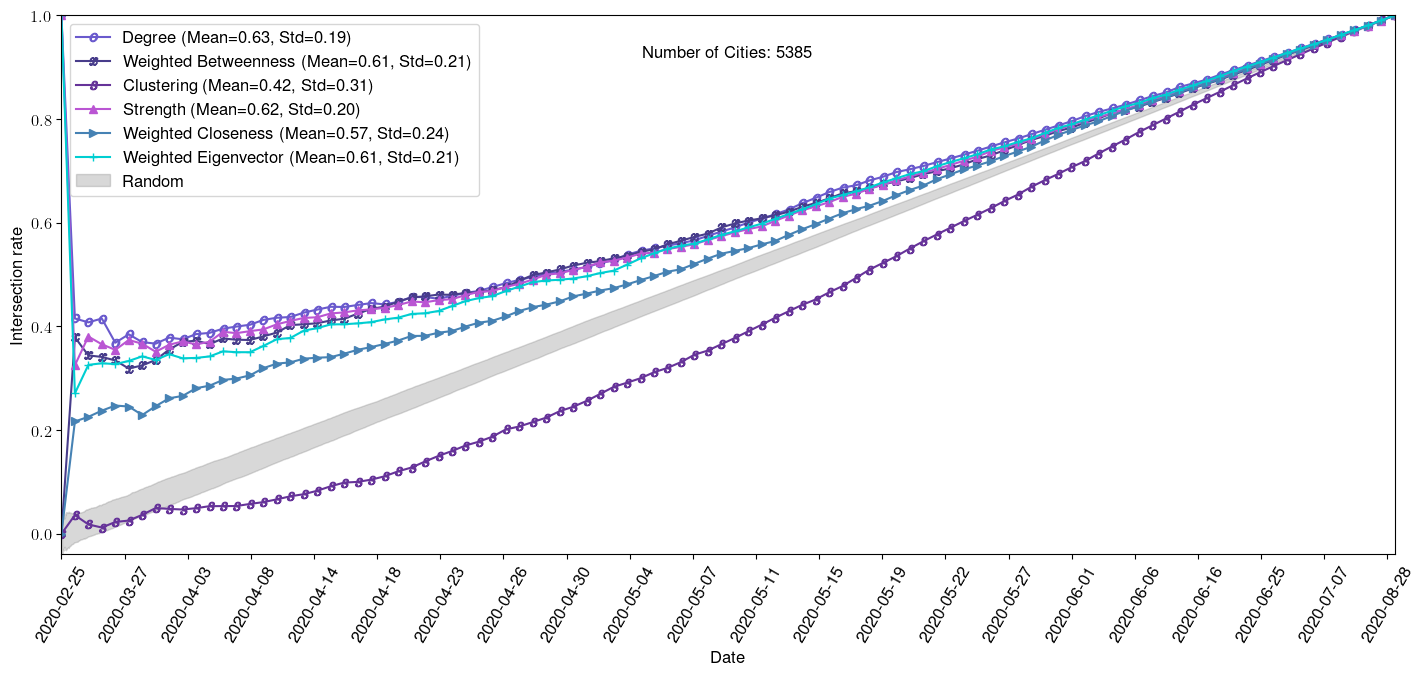

In [ ]:
graph_plot_DateXMetrics(255,min_cases[0],matrix_size)

In [ ]:
#MANI
df1= pd.read_csv('/content/drive/MyDrive/merged.csv')
df1 = df1.rename(columns={df1.columns[0]: 'id'})
df2 = pd.read_csv('/content/drive/MyDrive/dados_similaridade.csv')
df2['id'] -= 1
merged_df = pd.merge(df1, df2, on='id')
matrix_covid_dates = merged_df['dates']
print(merged_df)
matrix_size = len(merged_df)

        id       dates    degree  strength  betweenness  betweenness_w  \
0        0  2020-02-25  1.000000  1.000000     1.000000       1.000000   
1        1  2020-03-05  0.500000  0.500000     0.500000       0.500000   
2        2  2020-03-06  0.333333  0.333333     0.333333       0.333333   
3        3  2020-03-06  0.250000  0.500000     0.250000       0.250000   
4        4  2020-03-07  0.400000  0.600000     0.400000       0.200000   
...    ...         ...       ...       ...          ...            ...   
5380  5380  2020-09-15  0.998885  0.998885     0.998885       0.998885   
5381  5381  2020-09-15  0.999071  0.999071     0.999071       0.999071   
5382  5382  2020-09-21  0.999257  0.999257     0.999257       0.999257   
5383  5383  2020-09-22  0.999443  0.999443     0.999443       0.999443   
5384  5384  2020-09-23  0.999629  0.999629     0.999629       0.999629   

      closeness  closeness_w  upper_random_avg  lower_random_avg  
0      0.000000     0.000000          0.0000

In [ ]:
degrees_similarity = merged_df['degree']
betweenness_w_similarity = merged_df['betweenness_w']
betweenness_similarity = merged_df['betweenness']
strength_similarity = merged_df['strength']
closeness_w_similarity = merged_df['closeness_w']
closeness_similarity = merged_df['closeness']

In [ ]:
 def graph_plot_DateXMetrics2(step,cases,leng):
    rc('text', usetex=True)
    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 12}

    rc('font', **font)
    params = {'legend.fontsize': 12}
    plt.rcParams.update(params)
    plt.rcParams.update({
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif":"Helvetica",
    })


    # Indices for points along the x-axis intervals
    point_indices = np.linspace(0, len(matrix_covid_dates) - 1, num=100)
    date_indices = np.arange(len(matrix_covid_dates))
    # Interpolation of similarity points
    degrees_interp = np.interp(point_indices, date_indices, degrees_similarity)
    betweenness_w_interp = np.interp(point_indices, date_indices, betweenness_w_similarity)
    betweenness_interp = np.interp(point_indices, date_indices, betweenness_similarity)
    strength_interp = np.interp(point_indices, date_indices, strength_similarity)
    closeness_w_interp = np.interp(point_indices, date_indices, closeness_w_similarity)
    closeness_interp = np.interp(point_indices, date_indices, closeness_similarity)
    # Store the interpolation data in a pandas DataFrame
    interp_data_df = pd.DataFrame({
        'Degree': degrees_interp,
        'Weighted Betweenness': betweenness_interp,
        'Betweenness Weighted': betweenness_w_interp,
        'Strength': strength_interp,
        'Weighted Closeness': closeness_w_interp,
        'Closeness': closeness_interp
    })

    # Calculate means and standard deviations
    mean_degrees, std_degrees = np.mean(degrees_interp), np.std(degrees_interp)
    mean_betweenness_w, std_betweenness_w = np.mean(betweenness_w_interp), np.std(betweenness_w_interp)
    mean_betweenness, std_betweenness = np.mean(betweenness_interp), np.std(betweenness_interp)
    mean_strength, std_strength = np.mean(strength_interp), np.std(strength_interp)
    mean_closeness_w, std_closeness_w = np.mean(closeness_w_interp), np.std(closeness_w_interp)
    mean_closeness, std_closeness = np.mean(closeness_interp), np.std(closeness_interp)

    # Plot the graphs
    plt.figure(figsize=(14, 6))
    plt.plot(point_indices, degrees_interp, label=f'Degree (Mean={mean_degrees:.2f}, Std={std_degrees:.2f})',
             marker='$o$', color='SlateBlue')
    plt.plot(point_indices, betweenness_interp,
             label=f'Betweenness (Mean={mean_betweenness:.2f}, Std={std_betweenness:.2f})', marker='$x$',
             color='DarkSlateBlue')
    plt.plot(point_indices, betweenness_w_interp,
             label=f'Betweenness Weighted (Mean={mean_betweenness_w:.2f}, Std={std_betweenness_w:.2f})',
             marker='$s$', color='RebeccaPurple')
    plt.plot(point_indices, strength_interp, label=f'Strength (Mean={mean_strength:.2f}, Std={std_strength:.2f})',
             marker='^', color='MediumOrchid')
    plt.plot(point_indices, closeness_interp,
             label=f'Closeness (Mean={mean_closeness:.2f}, Std={std_closeness:.2f})', marker='>', color='SteelBlue')
    plt.plot(point_indices, closeness_w_interp,
             label=f'Weighted Closeness (Mean={mean_closeness_w:.2f}, Std={std_closeness_w:.2f})', marker='+',
             color='DarkTurquoise')
    plt.fill_between(merged_df.index, merged_df['lower_random_avg'],merged_df['upper_random_avg'] , color='gray', alpha=0.3)
    plt.fill_between([], [], [], color='gray', alpha=0.3, label='Random')
    plt.text(0.5, 0.93, f'Number of Cities: {leng}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    # Adjust the display of the x-axis
    visible_indices = np.arange(0, len(matrix_covid_dates), step=step)
    visible_dates = matrix_covid_dates[visible_indices]
    plt.tight_layout()
    plt.xticks(visible_indices, visible_dates, rotation=60)
    # Configure the plot title and axis labels
    plt.autoscale(axis='x', tight=True)
    plt.autoscale(axis='y', tight=True)
    plt.xlabel('Date')
    plt.ylabel('Intersection rate')
    # Display the legend
    plt.legend()
    plt.tight_layout()

    # Save and show the plot
    plt.savefig(f'/content/drive/MyDrive/Colab Notebooks/IC/Collection_metricsXdate_{cases}cases.pdf')
    plt.show()
    plt.close()

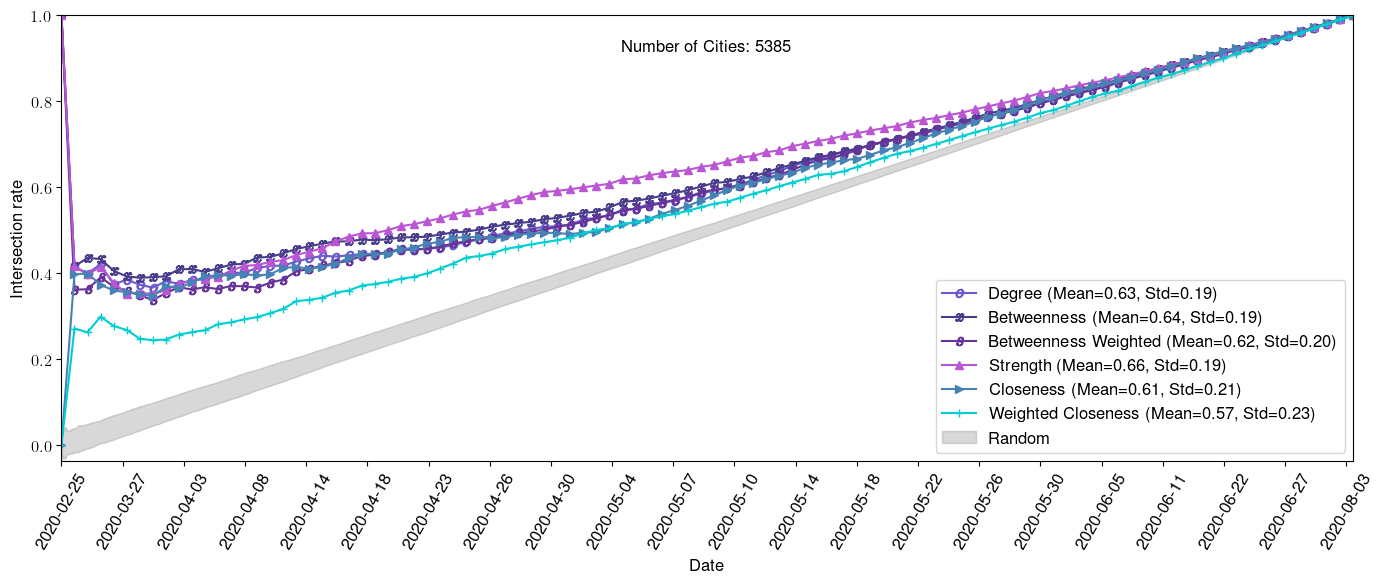

In [ ]:
graph_plot_DateXMetrics2(255,1,matrix_size)